<a href="https://colab.research.google.com/github/timothyosm/Learning-tensorFlow/blob/master/incomePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [171]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
SD = pd.read_csv('/content/drive/My Drive/salesData.csv')


In [173]:
SD.head(10)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
5,14.352514,367.940744
6,13.707780,308.894518
7,30.833985,696.716640
8,0.976870,55.390338
9,31.669465,737.800824


In [174]:
SD.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [175]:
SD.describe()


,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


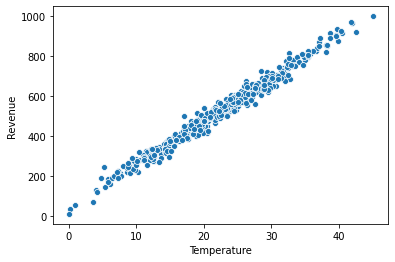

In [176]:
sns.scatterplot(SD['Temperature'], SD['Revenue'])

In [0]:
xtrain = SD['Temperature']
ytrain = SD['Revenue']

In [0]:
temp = SD['Temperature']
income = SD['Revenue']

In [190]:
xtrain.shape

(500,)

In [191]:
ytrain.shape

(500,)

In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 1, input_shape = [1]))

In [193]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss = 'mean_squared_error')

In [195]:
epochs_hist = model.fit(xtrain, ytrain, epochs=1000)

Epoch 1/1000
16/16 [==============================] - 0s 1ms/step - loss: 255866.2500
Epoch 2/1000
16/16 [==============================] - 0s 1ms/step - loss: 217226.5781
Epoch 3/1000
16/16 [==============================] - 0s 1ms/step - loss: 183842.2969
Epoch 4/1000
16/16 [==============================] - 0s 965us/step - loss: 153770.9375
Epoch 5/1000
16/16 [==============================] - 0s 1ms/step - loss: 128620.9141
Epoch 6/1000
16/16 [==============================] - 0s 1ms/step - loss: 105679.7578
Epoch 7/1000
16/16 [==============================] - 0s 1ms/step - loss: 86955.5234
Epoch 8/1000
16/16 [==============================] - 0s 1ms/step - loss: 70719.0547
Epoch 9/1000
16/16 [==============================] - 0s 1ms/step - loss: 57365.7578
Epoch 10/1000
16/16 [==============================] - 0s 1ms/step - loss: 45705.1836
Epoch 11/1000
16/16 [==============================] - 0s 1ms/step - loss: 35981.3047
Epoch 12/1000
16/16 [==============================] - 

In [196]:
epochs_hist.history.keys()

dict_keys(['loss'])

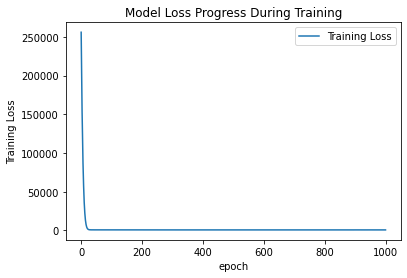

In [198]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

In [199]:
model.get_weights()

[array([[21.387728]], dtype=float32), array([44.73099], dtype=float32)]

In [202]:
temp = 42
income = model.predict([temp])
print('predicted income: ', income)

predicted income:  [[943.01556]]
